## Multivariate Reduction Practice

Let's continue our discussion with multivariate data reduction. We will focus on dimensionality reduction using principal component analysis. The questions are partially complete. You may have to debug/modify/complete the code to generate the desired output. 

**Load the data** into movies_data dataframe.

In [11]:
movies_data <- read.csv("/dsa/data/all_datasets/movies/movie_metadata.csv", header = T, sep=",")
head(movies_data)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
1,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
2,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
3,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
4,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
5,,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,,,,NA,NA,12,7.1,NA,0
6,Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000


Remove the rows that contain any NA values.

In [12]:
# Count number of rows in the dataset
nrow(movies_data)

# Omit rows from  the dataset that contain NA values
movies_data <- na.omit(movies_data)

# Count number of rows again in the dataset
nrow(movies_data)

# Create a new dataframe called less_data excluding all rows from movies_data that contain NA values and non-numeric variables
less_data <- movies_data[!sapply(movies_data,class) %in% c("factor","character")]

[1] 5043

[1] 3801

#### Correlation Matrix


In [13]:
cor(less_data) # get the correlations for less_data

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.00000000,0.22770510,0.17691581,0.25508576,0.17019757,0.46853499,0.59498973,0.24100544,-0.03400866,0.56679514,0.10568105,0.41038049,0.25583672,0.34388077,0.18064082,0.70396936
duration,0.22770510,1.00000000,0.17973400,0.12577123,0.08471988,0.24474304,0.33803814,0.12117142,0.02909973,0.35039147,0.06816122,-0.12942203,0.12945227,0.36612369,0.15311429,0.21493610
director_facebook_likes,0.17691581,0.17973400,1.00000000,0.11824025,0.09073261,0.13993814,0.30061915,0.11974122,-0.04761895,0.21831138,0.01855931,-0.04460636,0.11690032,0.19083814,0.03787106,0.16273728
actor_3_facebook_likes,0.25508576,0.12577123,0.11824025,1.00000000,0.25372024,0.30158391,0.26945536,0.49068631,0.10501768,0.20732096,0.04047813,0.11553537,0.55418237,0.06497354,0.04712336,0.27251268
actor_1_facebook_likes,0.17019757,0.08471988,0.09073261,0.25372024,1.00000000,0.14704475,0.18226526,0.94492526,0.05757968,0.12522139,0.01708638,0.09374233,0.39267587,0.09313142,0.05760375,0.13177824
gross,0.46853499,0.24474304,0.13993814,0.30158391,0.14704475,1.00000000,0.62694784,0.23868703,-0.03225370,0.54710674,0.10038914,0.05236800,0.25465945,0.21212439,0.06526004,0.36849402
num_voted_users,0.59498973,0.33803814,0.30061915,0.26945536,0.18226526,0.62694784,1.00000000,0.25194009,-0.03202642,0.77992455,0.06682395,0.02193838,0.24666028,0.47791732,0.08548456,0.51869065
cast_total_facebook_likes,0.24100544,0.12117142,0.11974122,0.49068631,0.94492526,0.23868703,0.25194009,1.00000000,0.08098495,0.18228784,0.02942336,0.12401462,0.64401612,0.10625870,0.06967465,0.20706080
facenumber_in_poster,-0.03400866,0.02909973,-0.04761895,0.10501768,0.05757968,-0.03225370,-0.03202642,0.08098495,1.00000000,-0.07940360,-0.02175723,0.06795245,0.07413806,-0.06429247,0.01662043,0.01433235
num_user_for_reviews,0.56679514,0.35039147,0.21831138,0.20732096,0.12522139,0.54710674,0.77992455,0.18228784,-0.07940360,1.00000000,0.07125387,0.01759409,0.18958182,0.32252237,0.09855669,0.37197029


The output of cor() function is the correlation coefficient between each and every variable combination in the dataset. 
A variable's correlation to itself is always 1.

Variables

- movie_facebook_likes
- num_user_for_reviews
- num_voted_users
- num_critic_for_reviews
- duration

are the most correlated with imdb_score. 
<div>
    <ul>
        <br>
        <li> 
            <span style="color:#cc1652">cast_total_facebook_likes</span> has a strong positive correlation with the <span style="color:#d38032">actor_1_facebook_likes</span>, and has smaller positive correlation with both <span style="color:#30a5d3">actor_2_facebook_likes</span> and <span style="color:#08cc6d">actor_3_facebook_likes</span>
        </li>
        <br>
        <li>
            <span style="color:#d32e44">movie_facebook_likes</span> has strong correlation with <span style="color:#8934c1">num_critic_for_reviews</span>, meaning that the popularity of a movie in social networks can be largely affected by the critics
        </li>
        <br>
        <li> <span style="color:#d32e44">movie_facebook_likes</span> has a decent amount of correlation with the <span style="color:#1d48d3">num_voted_users</span>
        </li>
        <br>
        <li> <span style="color:#cc1652">gross</span> has a strong positive correlation with the <span style="color:#1d48d3">num_voted_users</span>
        </li>
    </ul>
</div>


Contradicting correlations
---------------------------

<div>
    <ul>
        <br>
        <li> 
            <span style="color:#cc1652">imdb_score</span> has very small positive correlation with <span style="color:#08cc6d">director_facebook_likes</span>. So we cant guarantee a popular director's movie will be great.
        </li>
        <br>
        <li>
            <span style="color:#cc1652">imdb_score</span> has very small positive correlation with the <span style="color:#d32e44">actor_1_facebook_likes</span>. Just like a famous director, we cant guarantee a popular actor's movie will be great.
        </li>
        <br>
        <li> <span style="color:#cc1652">imdb_score</span> has a small but positive correlation with <span style="color:#d32e44">duration</span>. Highly rated movies tend to be longer in duration.
        </li>
        <br>
        <li> <span style="color:#cc1652">num_voted_users</span> and <span style="color:#1d48d3">num_user_for_reviews</span> demonstrate a small positive correlation. Maybe more reviews are made on good movies.
        </li>
        <br>
        <li> <span style="color:#cc1652">imdb_score</span> has almost no correlation with <span style="color:#11c627">budget</span>. Big budget movies will not necessarily turn out great
        </li>
    </ul>
</div>

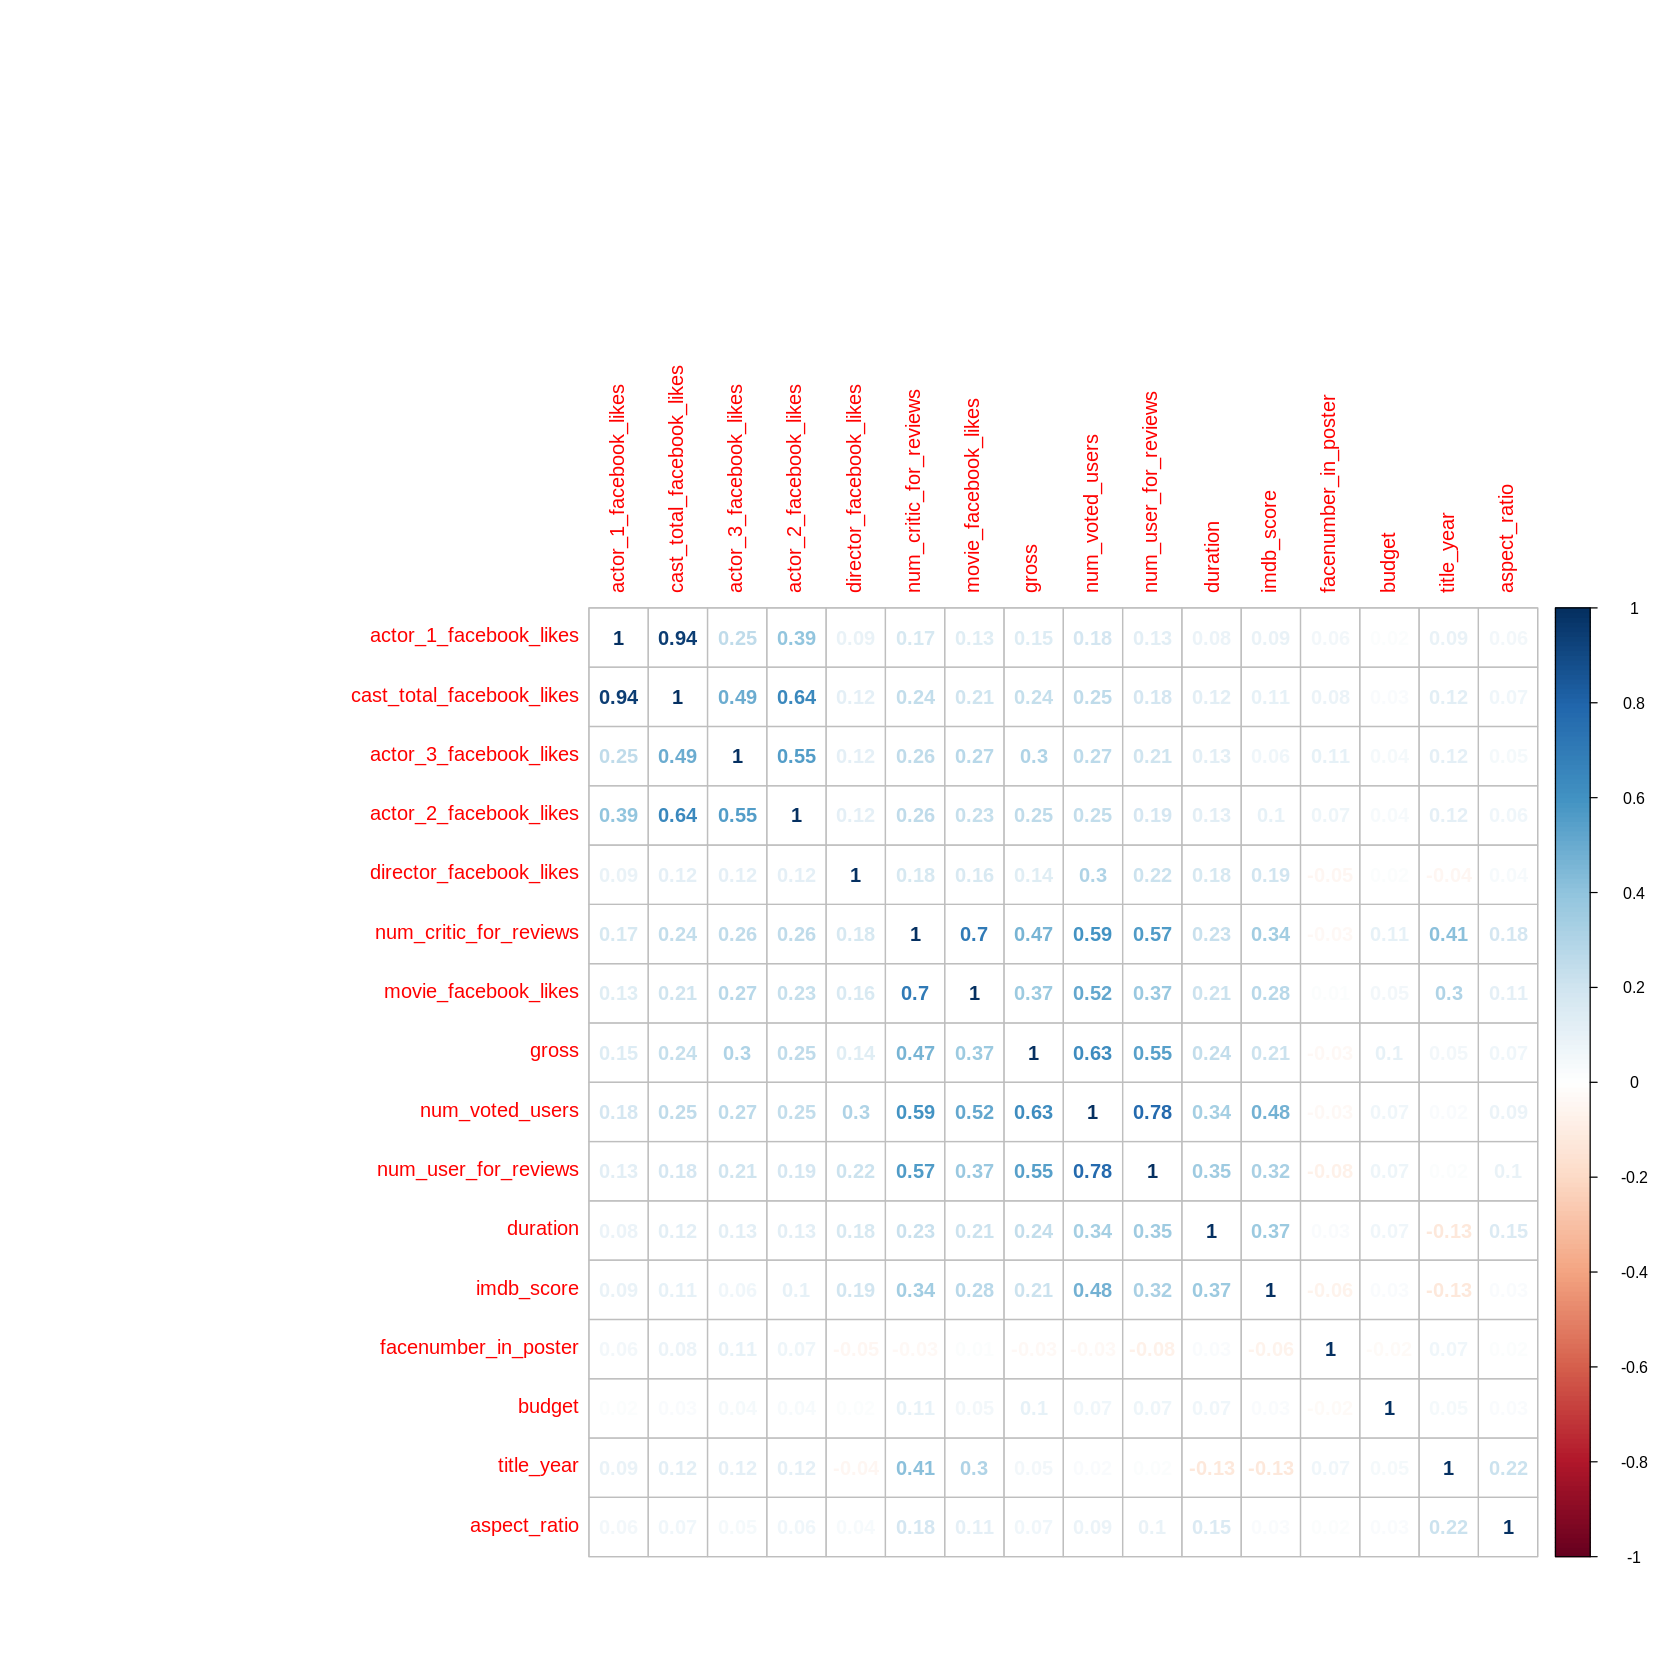

In [14]:
options(repr.plot.width=14, repr.plot.height=14)

library('corrplot') #package corrplot
cors <- cor(less_data) # get the correlations
#The output of the function cor() is the correlation coefficients between each variable and the others. 

corrplot(cors, method = "number",number.cex=1, order="hclust") #plot the matrix
# method takes different inputs like "number", "circle", "ellipse" etc. 

**Question 1.a:** Which correlations surprise you and/or seem interesting for investigation?

Let's continue our discussion with PCA. As we have seen in lab notebook we have to standardize the variables. 

**Question 2:** Use scale() function to standardize the numeric variables in movies_data and assign the new data to a variable called standard_vars.

In [15]:
standard_vars <- as.data.frame(scale(less_data))
dim(standard_vars)
head(standard_vars)

[1] 3801   16

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.508980,2.9879271,-0.26174734,0.04838772,-0.4319618,10.1040151,5.1583530,-0.34552775,-0.6717869,6.6344079,0.8505943,0.6029682,-0.2358878,1.3558130,-0.9370201,1.1113488
2,1.101861,2.5912537,-0.07721951,0.12533641,2.0926134,3.6707931,2.4193120,1.93928121,-0.6717869,2.2056624,1.1309436,0.4020317,0.6623369,0.5994134,0.6806695,-0.4336351
3,3.529737,1.6656825,-0.26174734,-0.31990466,0.2153651,2.1116236,1.1299198,0.01497179,-0.1846709,1.6106106,0.8861942,1.2057778,-0.3559016,0.3157635,0.6806695,3.5458687
4,5.237343,2.3708796,6.94893180,11.80031079,1.2510883,5.6491903,6.8621219,5.00604761,-0.6717869,5.7735339,0.9084441,0.9043730,4.6406941,1.9231127,0.6806695,7.2444664
6,2.396728,0.9604855,-0.10606222,-0.12408350,-0.4552656,0.3002385,0.7097149,-0.50099515,-0.1846709,0.9862941,0.9694090,0.9043730,-0.3030778,0.1266636,0.6806695,0.6899895
7,1.830224,2.0182811,-0.26174734,1.71737837,1.0568902,4.0576428,1.8373985,1.81878216,-0.6717869,3.8249834,0.9440440,0.4020317,1.9884560,-0.2515362,0.6806695,-0.4336351


**Question 3:** Run prcomp() function on standard_vars created above and assign the result to movies_data_pca 

In [16]:
# Compute the Principal Components. Run prcomp() function on standardardized variables created above.
movies_data_pca <- prcomp(standard_vars)

In [17]:
help(prcomp)

**If you go to the help page for `prcomp` you will find in the details section,**

`The calculation is done by a singular value decomposition of the (centered and scaled) data matrix, not by using eigen on the covariance matrix. This is generally the preferred method for numerical accuracy.`

For `princomp()` you will see,

`The calculation is done using eigen on the correlation or covariance matrix, as determined by cor. This is done for compatibility with the S-PLUS result. A preferred method of calculation is to use svd on x, as is done in prcomp."`

In [18]:
summary(movies_data_pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1085 1.4616 1.22342 1.02521 1.00690 0.99790 0.93972
Proportion of Variance 0.2779 0.1335 0.09355 0.06569 0.06337 0.06224 0.05519
Cumulative Proportion  0.2779 0.4114 0.50493 0.57063 0.63399 0.69623 0.75142
                           PC8     PC9    PC10    PC11   PC12    PC13    PC14
Standard deviation     0.93055 0.88380 0.76887 0.69505 0.6657 0.64476 0.49547
Proportion of Variance 0.05412 0.04882 0.03695 0.03019 0.0277 0.02598 0.01534
Cumulative Proportion  0.80554 0.85436 0.89131 0.92150 0.9492 0.97518 0.99052
                          PC15    PC16
Standard deviation     0.38708 0.04209
Proportion of Variance 0.00936 0.00011
Cumulative Proportion  0.99989 1.00000

Look at the **structure** of what prcomp returns: **x is the matrix that has the transformed data in PCA space. Each column is a PC.** In princomp, it would be called **scores**.

In [19]:
str(movies_data_pca)

List of 5
 $ sdev    : num [1:16] 2.11 1.46 1.22 1.03 1.01 ...
 $ rotation: num [1:16, 1:16] -0.362 -0.207 -0.158 -0.252 -0.223 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:16] "num_critic_for_reviews" "duration" "director_facebook_likes" "actor_3_facebook_likes" ...
  .. ..$ : chr [1:16] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:16] 3.70e-17 -1.99e-16 -1.42e-17 2.68e-17 -1.23e-17 ...
  ..- attr(*, "names")= chr [1:16] "num_critic_for_reviews" "duration" "director_facebook_likes" "actor_3_facebook_likes" ...
 $ scale   : logi FALSE
 $ x       : num [1:3801, 1:16] -10.1 -5.16 -4.55 -18.72 -1.86 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3801] "1" "2" "3" "4" ...
  .. ..$ : chr [1:16] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


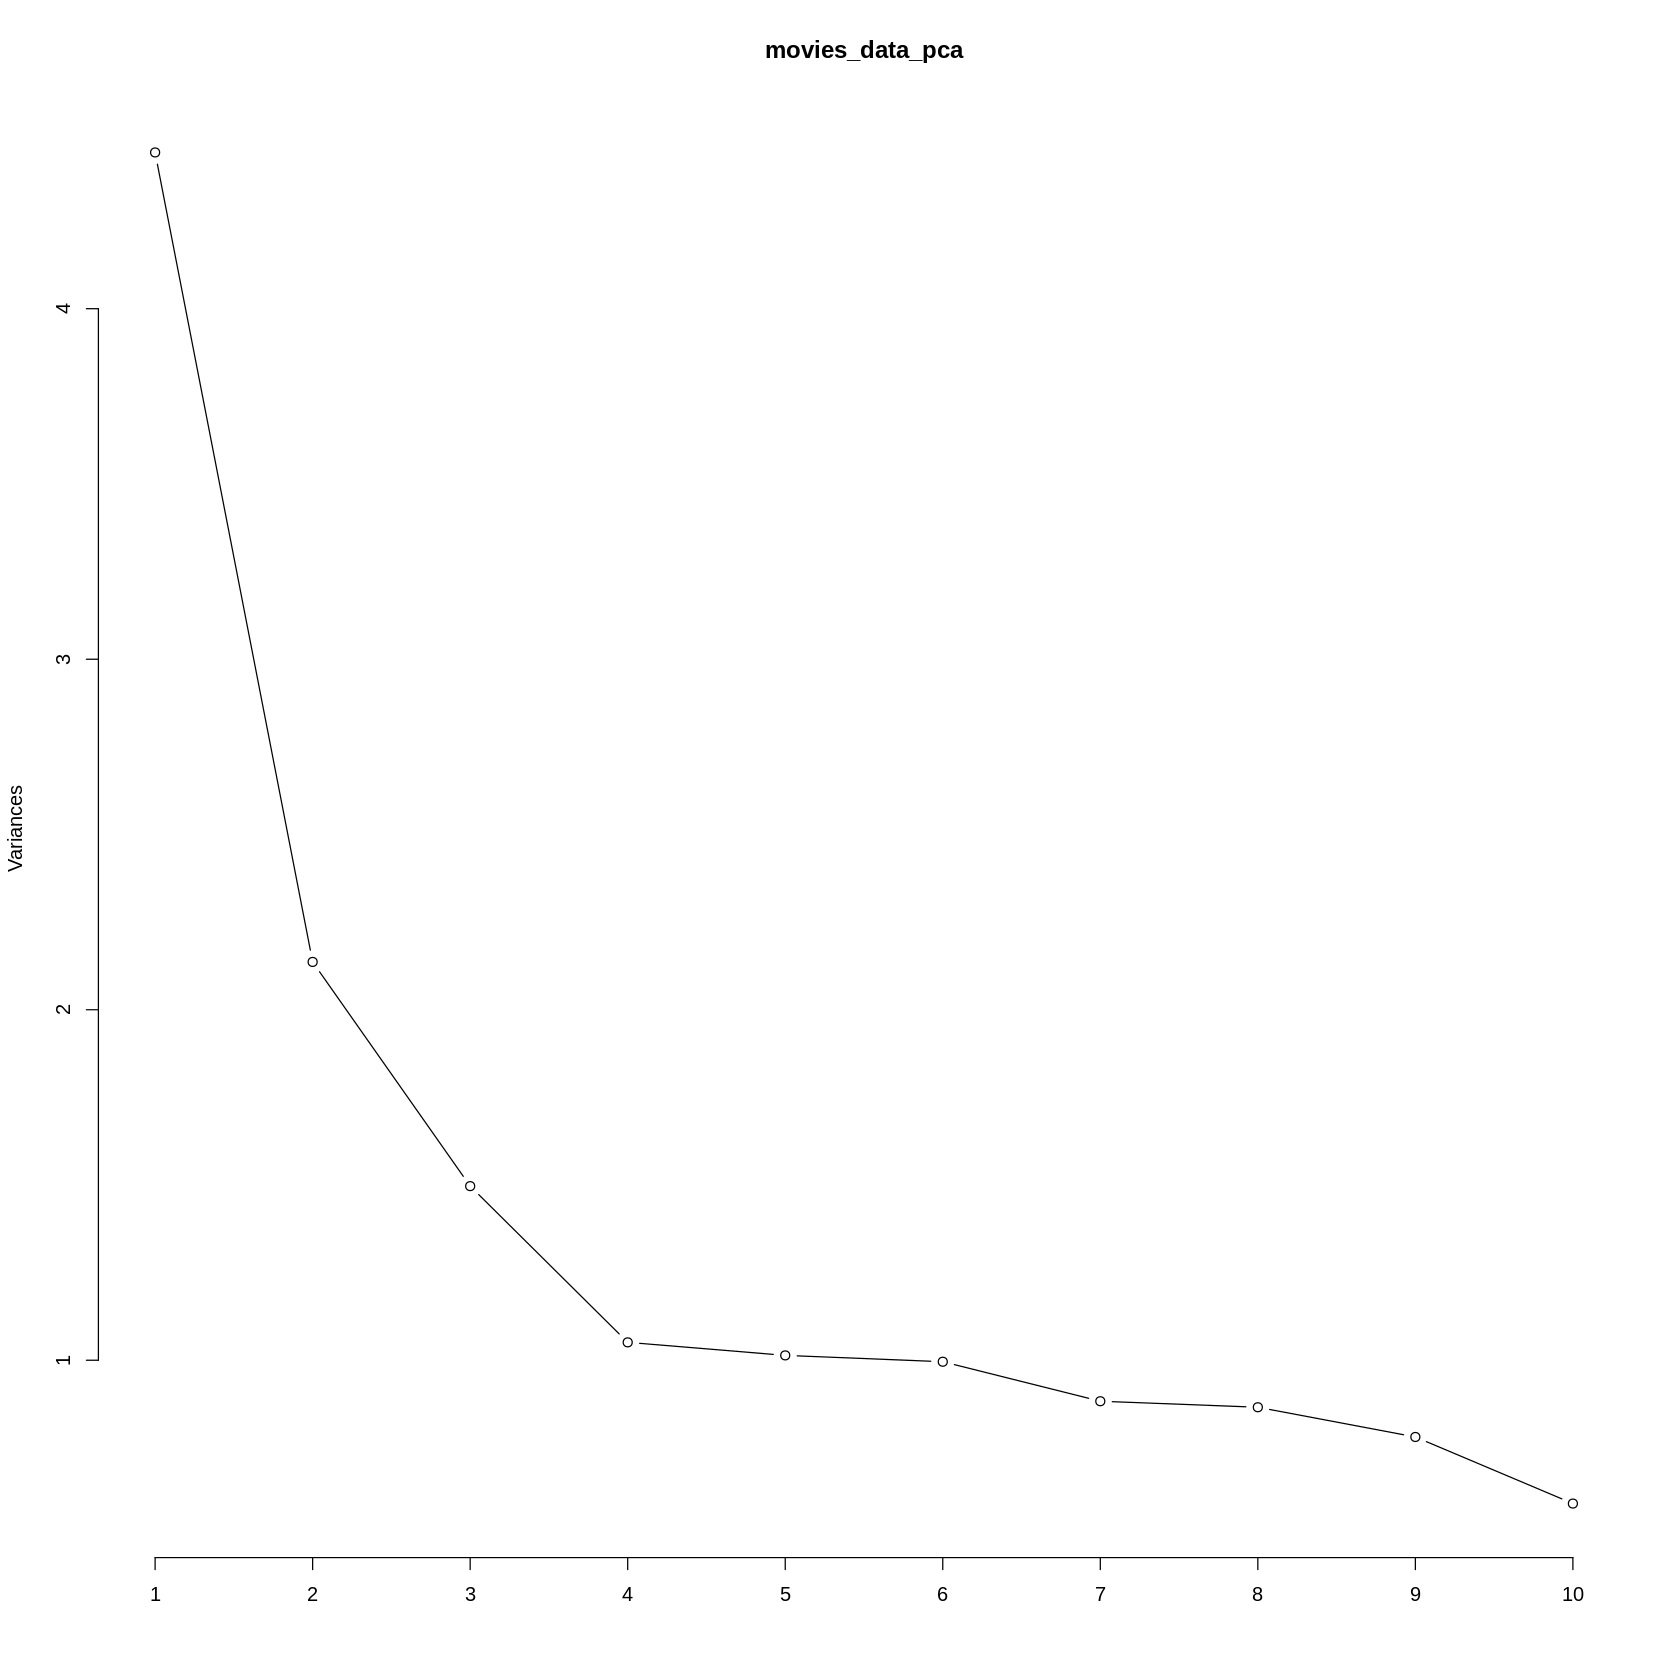

In [20]:
screeplot(movies_data_pca, type="lines")

**Question 4:** What are your observations from the plot below? Write a few words below about how you interpret points and vectors?

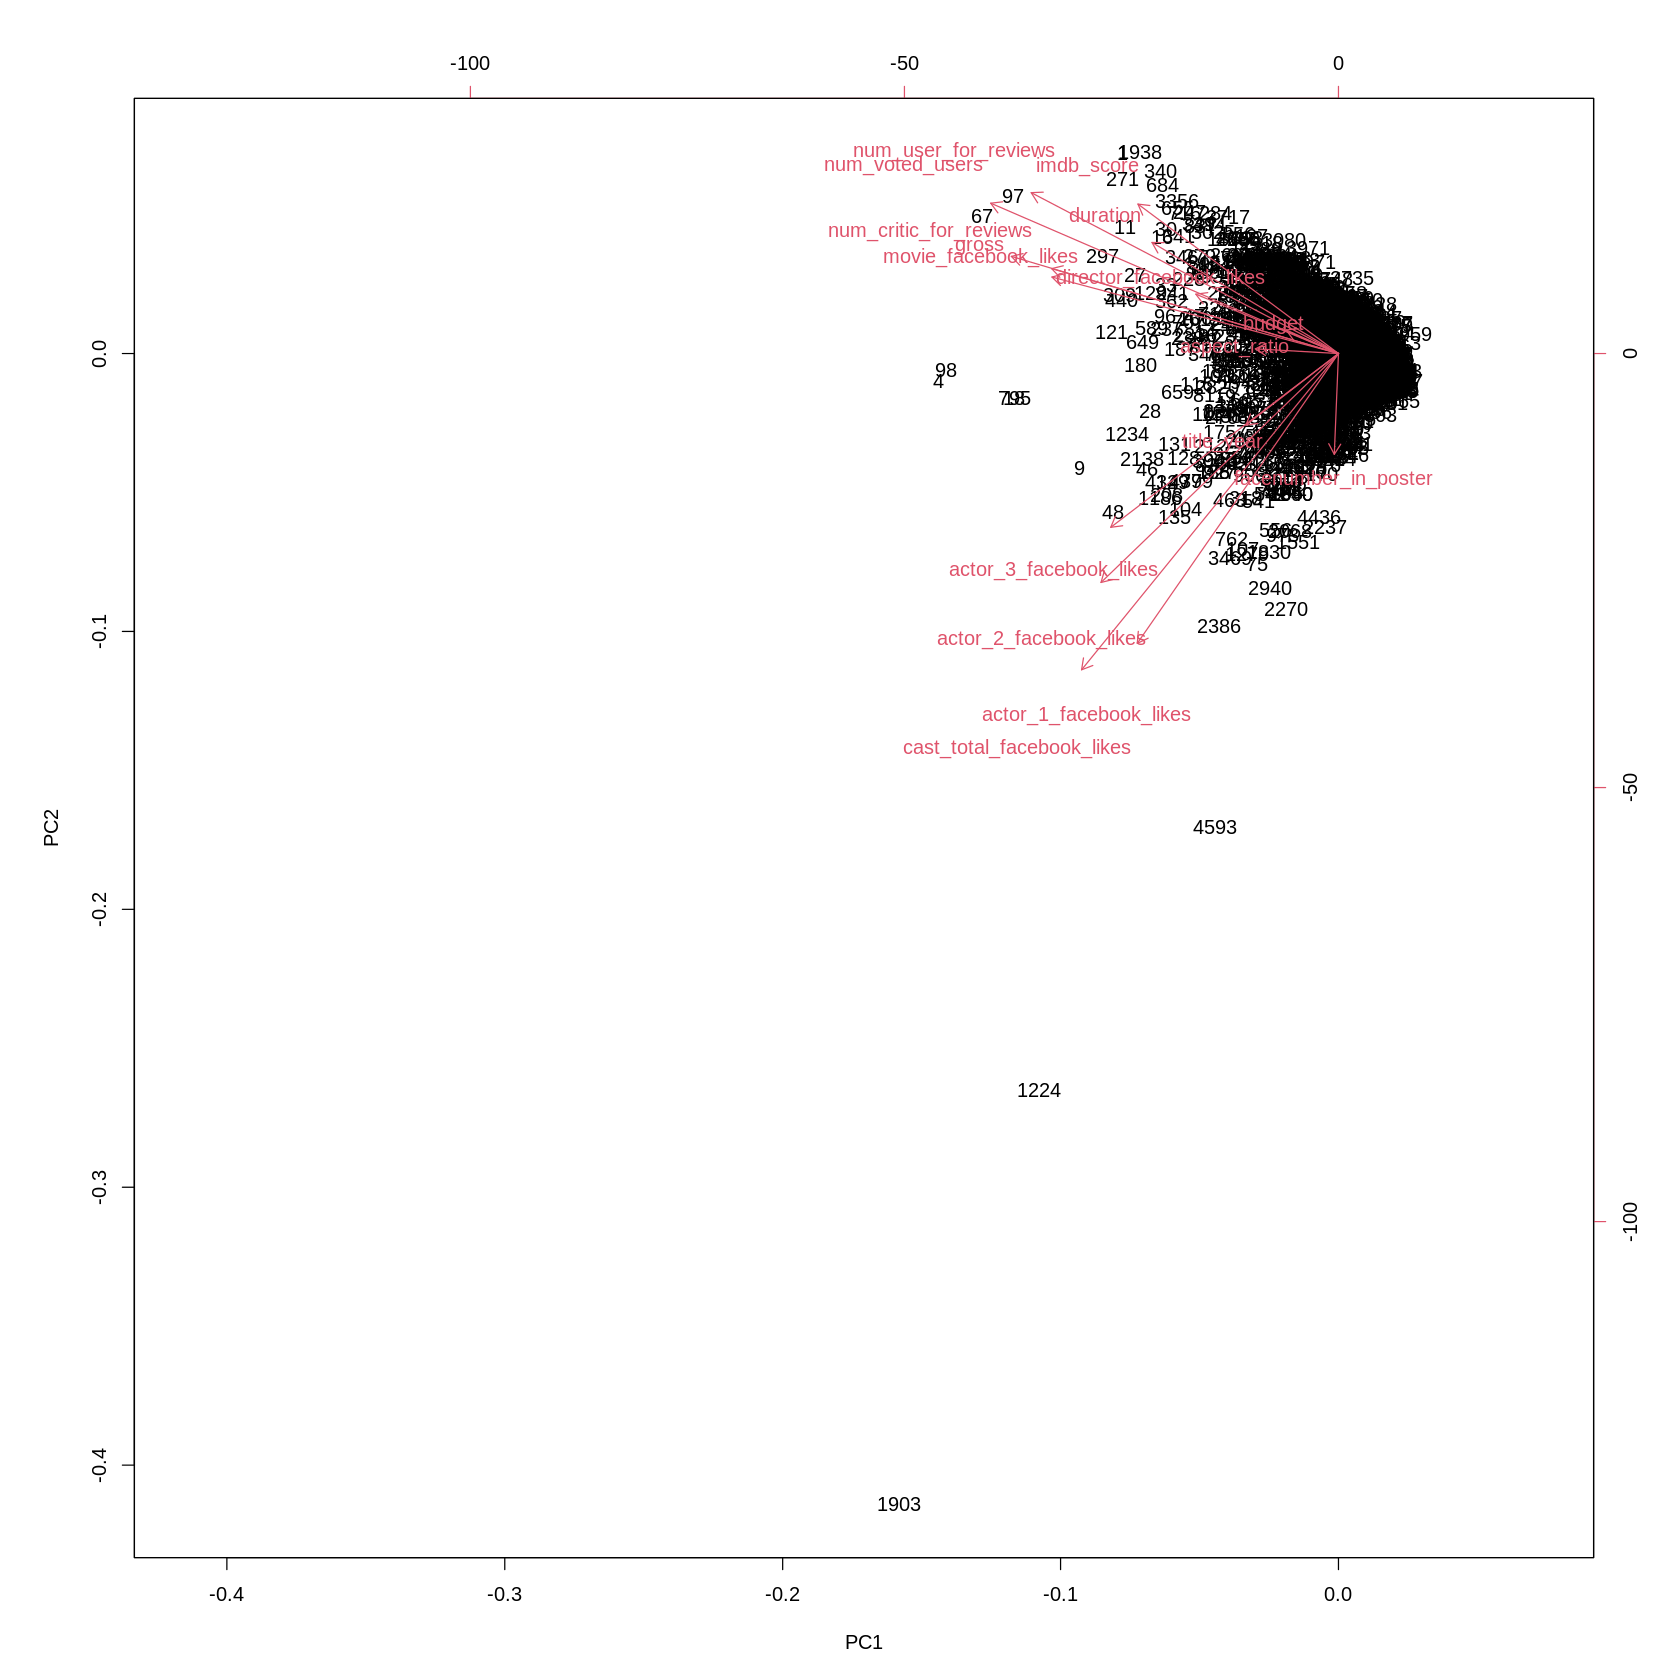

In [21]:
biplot(movies_data_pca) 

Look at the dimensions of the PCA we ran. We are interested in the **x** part of movies_data_pca for the dimensions.

In [22]:
dim(movies_data_pca$x)

[1] 3801   16

**Question 5:** Fit a multiple regression model to predict imdb_score on less_data using the **first 4 principal components created above**. 

In [23]:
# movies_data_pca$x is a list that contains all the principal components. You can access components using 
# subscripts [,1], [,2], [,3], and so on

fit = lm(movies_data$imdb_score~movies_data_pca$x[,1]+movies_data_pca$x[,2]+movies_data_pca$x[,3]+movies_data_pca$x[,4])
summary(fit)


Call:
lm(formula = movies_data$imdb_score ~ movies_data_pca$x[, 1] + 
    movies_data_pca$x[, 2] + movies_data_pca$x[, 3] + movies_data_pca$x[, 
    4])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6547 -0.4121  0.0727  0.5194  2.0506 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6.466035   0.012208  529.66   <2e-16 ***
movies_data_pca$x[, 1] -0.234907   0.005791  -40.57   <2e-16 ***
movies_data_pca$x[, 2]  0.252552   0.008353   30.23   <2e-16 ***
movies_data_pca$x[, 3]  0.288003   0.009980   28.86   <2e-16 ***
movies_data_pca$x[, 4] -0.211451   0.011909  -17.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7526 on 3796 degrees of freedom
Multiple R-squared:  0.4941,	Adjusted R-squared:  0.4936 
F-statistic:   927 on 4 and 3796 DF,  p-value: < 2.2e-16


**NOTE** that the PCA decomposition above already has the IMDB score variable in it; for an actual predictive model to be used with unseen data, we should use only the PCA of variables excluding the predicted variable. 

Let's try to fit a linear multiple regression model using the most correlated variables we found.

**Question 6.a:** Fit a multiple regression model on movies_data to predict imdb_score using variables movie_facebook_likes, num_user_for_reviews, num_voted_users, num_critic_for_reviews and duration.

In [24]:
fit1=lm(imdb_score ~ movie_facebook_likes + num_user_for_reviews + num_voted_users + num_critic_for_reviews + duration,
       data=movies_data)
summary(fit1)


Call:
lm(formula = imdb_score ~ movie_facebook_likes + num_user_for_reviews + 
    num_voted_users + num_critic_for_reviews + duration, data = movies_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5866 -0.5218  0.0737  0.6219  2.5695 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             4.801e+00  7.590e-02  63.245  < 2e-16 ***
movie_facebook_likes   -3.322e-06  9.897e-07  -3.357 0.000795 ***
num_user_for_reviews   -5.969e-04  5.941e-05 -10.047  < 2e-16 ***
num_voted_users         3.582e-06  1.658e-07  21.609  < 2e-16 ***
num_critic_for_reviews  1.367e-03  1.852e-04   7.378 1.97e-13 ***
duration                1.174e-02  6.823e-04  17.205  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8861 on 3795 degrees of freedom
Multiple R-squared:  0.2989,	Adjusted R-squared:  0.298 
F-statistic: 323.6 on 5 and 3795 DF,  p-value: < 2.2e-16


**Question 6.b:** Compare the $R^2$ value for models fit1 and fit. Write your opinion about the models.

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.0666 1.4341 1.19474 1.01774 1.00631 0.99535 0.93807
Proportion of Variance 0.2847 0.1371 0.09516 0.06905 0.06751 0.06605 0.05867
Cumulative Proportion  0.2847 0.4218 0.51698 0.58603 0.65354 0.71959 0.77826
                          PC8    PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.9133 0.8343 0.70933 0.67620 0.64544 0.49547 0.41448
Proportion of Variance 0.0556 0.0464 0.03354 0.03048 0.02777 0.01637 0.01145
Cumulative Proportion  0.8339 0.8803 0.91381 0.94429 0.97206 0.98843 0.99988
                          PC15
Standard deviation     0.04225
Proportion of Variance 0.00012
Cumulative Proportion  1.00000

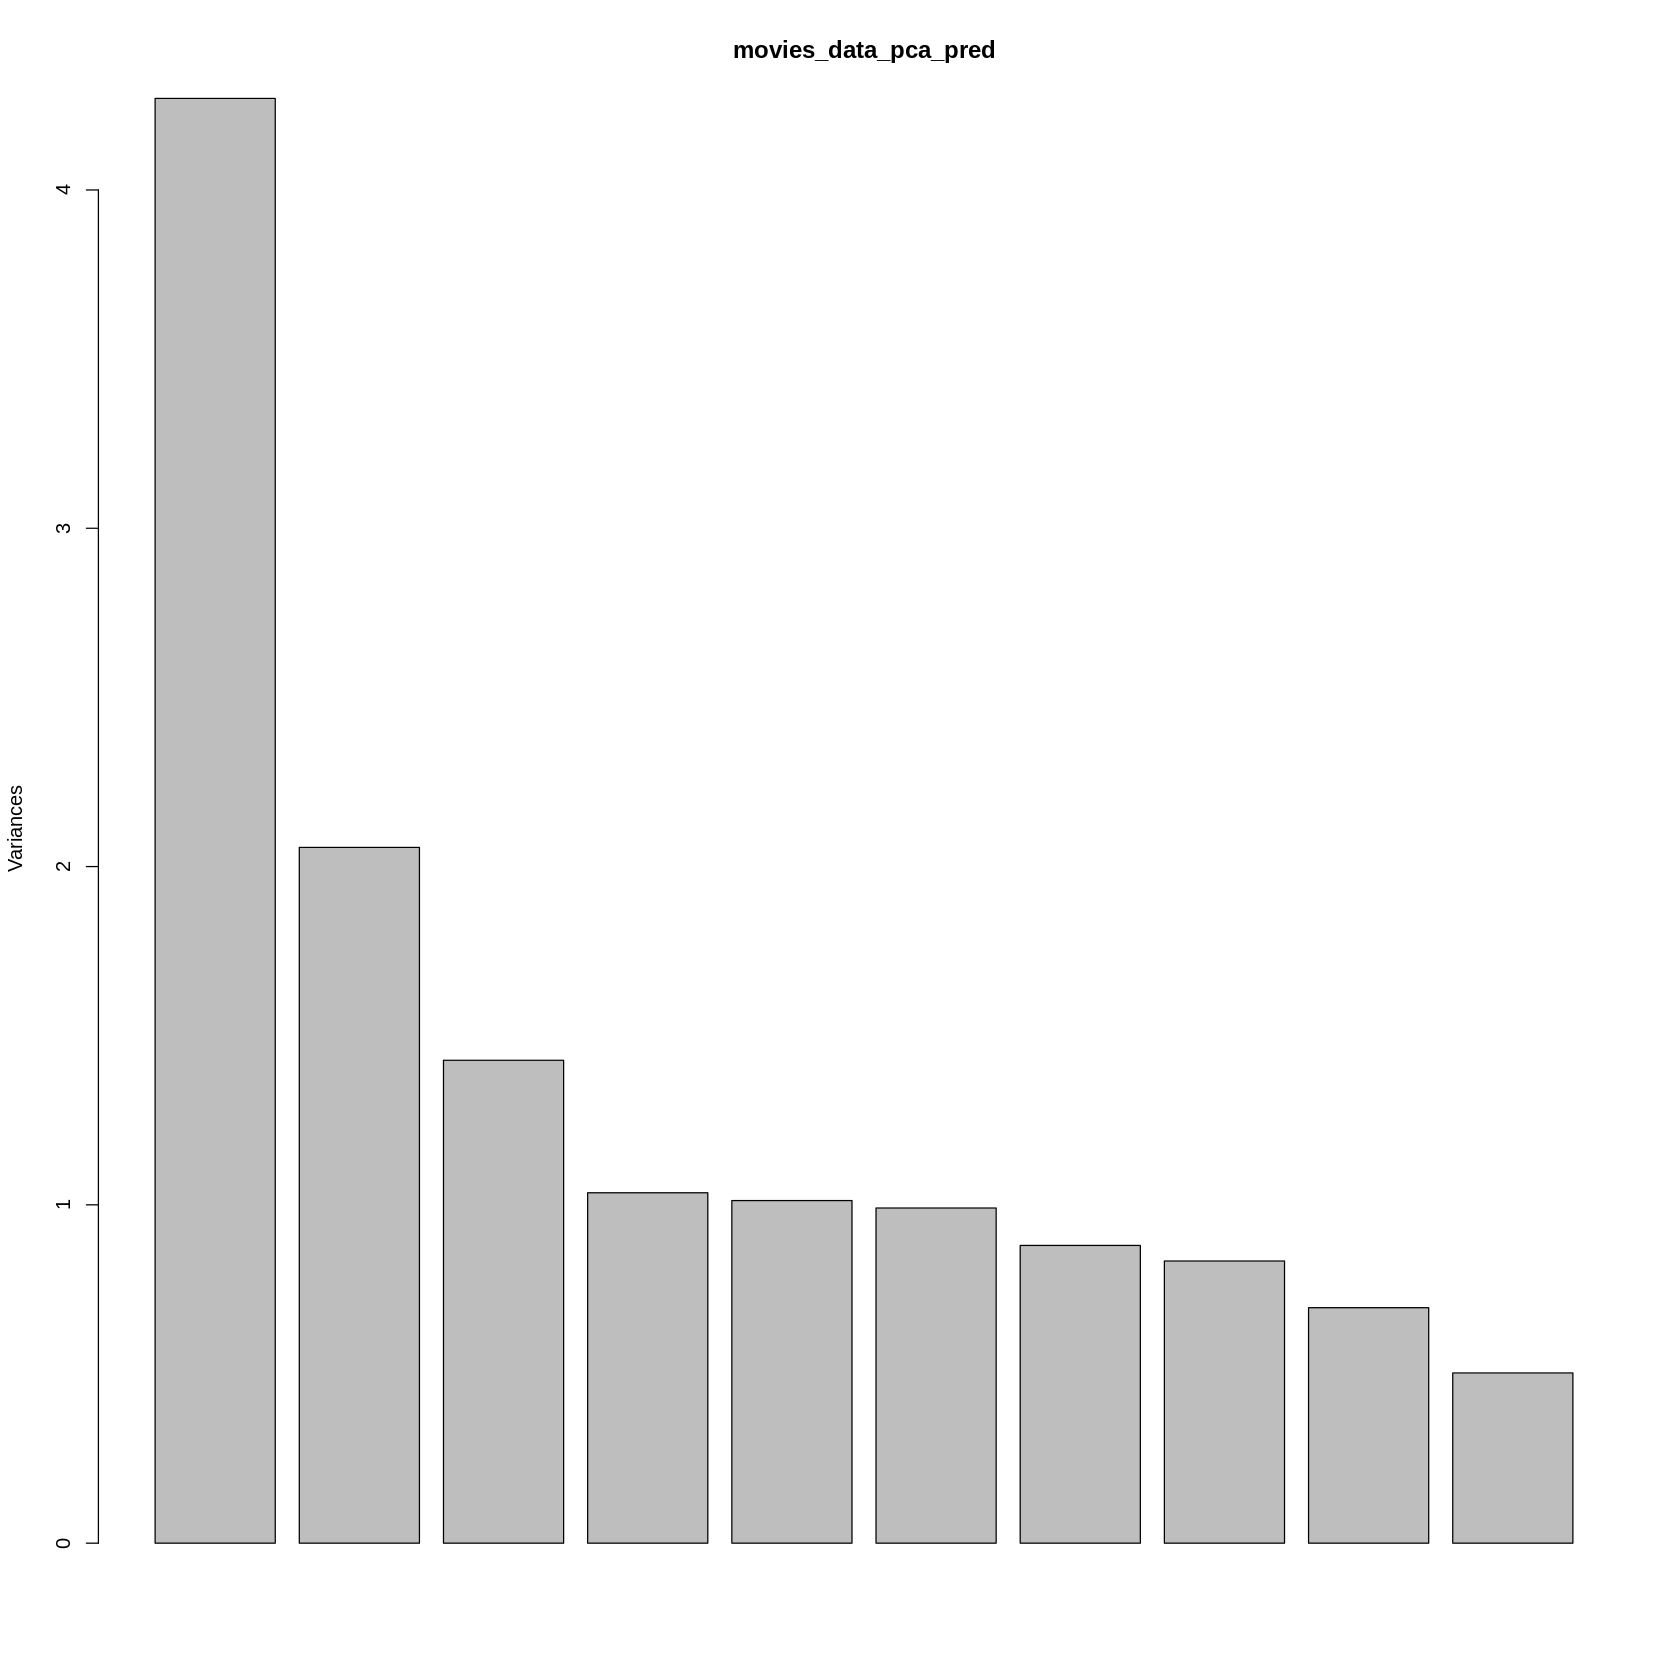

In [25]:
# remove IMDB score and run PCA so that we can have a predictive model that does 
# not depend on the predicted variable. 

movies_data_pca_pred <- prcomp(standard_vars[,-14]) 
summary(movies_data_pca_pred)
screeplot(movies_data_pca_pred)

In [26]:
fitp = lm(movies_data$imdb_score~movies_data_pca_pred$x[,1]+movies_data_pca_pred$x[,2]+movies_data_pca_pred$x[,3]+movies_data_pca_pred$x[,4])
summary(fitp)


Call:
lm(formula = movies_data$imdb_score ~ movies_data_pca_pred$x[, 
    1] + movies_data_pca_pred$x[, 2] + movies_data_pca_pred$x[, 
    3] + movies_data_pca_pred$x[, 4])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8049 -0.5144  0.1120  0.6634  2.3990 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  6.46603    0.01502 430.413  < 2e-16 ***
movies_data_pca_pred$x[, 1] -0.19027    0.00727 -26.170  < 2e-16 ***
movies_data_pca_pred$x[, 2] -0.16546    0.01048 -15.793  < 2e-16 ***
movies_data_pca_pred$x[, 3]  0.17794    0.01258  14.149  < 2e-16 ***
movies_data_pca_pred$x[, 4]  0.07333    0.01476   4.968 7.08e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9262 on 3796 degrees of freedom
Multiple R-squared:  0.2339,	Adjusted R-squared:  0.2331 
F-statistic: 289.8 on 4 and 3796 DF,  p-value: < 2.2e-16


**This PCA model** has a lower R2 score as expected; it does not have the predicted variable. In both PCA decompositions, we took the first four principal components and in each case they accounted roughly for the 58% of the total variance. 

**Question 7:** Build a model to predict imdb_score using all the independent features of less_data.

In [27]:
fit2=lm(imdb_score~., data=less_data)
summary(fit2)


Call:
lm(formula = imdb_score ~ ., data = less_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4269 -0.4640  0.0779  0.5824  2.4240 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                4.610e+01  3.355e+00  13.739  < 2e-16 ***
num_critic_for_reviews     2.532e-03  1.964e-04  12.890  < 2e-16 ***
duration                   1.076e-02  6.799e-04  15.819  < 2e-16 ***
director_facebook_likes    3.183e-06  4.794e-06   0.664 0.506700    
actor_3_facebook_likes     6.955e-05  2.141e-05   3.248 0.001171 ** 
actor_1_facebook_likes     7.063e-05  1.304e-05   5.418 6.39e-08 ***
gross                     -1.983e-09  2.691e-10  -7.369 2.10e-13 ***
num_voted_users            3.739e-06  1.740e-07  21.487  < 2e-16 ***
cast_total_facebook_likes -6.960e-05  1.299e-05  -5.357 8.99e-08 ***
facenumber_in_poster      -2.428e-02  6.848e-03  -3.546 0.000396 ***
num_user_for_reviews      -6.240e-04  5.761e-05 -10.832  < 2e-16 ***
budget   

**Question 8:** Compare the model built using first 4 principal components to the models built using the variables in the dataset less_data. 

**Question 9a:** Run factanal() function to generate 2 factors for less_data.  

In [28]:
factors <- factanal(less_data, 2, rotation="varimax")
print(factors, digits=2, cutoff=0.3, sort=TRUE)


Call:
factanal(x = less_data, factors = 2, rotation = "varimax")

Uniquenesses:
   num_critic_for_reviews                  duration   director_facebook_likes 
                     0.51                      0.85                      0.91 
   actor_3_facebook_likes    actor_1_facebook_likes                     gross 
                     0.72                      0.10                      0.55 
          num_voted_users cast_total_facebook_likes      facenumber_in_poster 
                     0.16                      0.00                      0.99 
     num_user_for_reviews                    budget                title_year 
                     0.33                      0.99                      0.98 
   actor_2_facebook_likes                imdb_score              aspect_ratio 
                     0.58                      0.77                      0.98 
     movie_facebook_likes 
                     0.65 

Loadings:
                          Factor1 Factor2
num_critic_for_reviews

**Question 9b:** Look at component loadings; can you group the variables by two factors similar to the lab notebooks? 

In [29]:
factors <- factanal(less_data, 5, rotation="varimax")
print(factors, digits=2, cutoff=0.3, sort=TRUE)


Call:
factanal(x = less_data, factors = 5, rotation = "varimax")

Uniquenesses:
   num_critic_for_reviews                  duration   director_facebook_likes 
                     0.05                      0.85                      0.90 
   actor_3_facebook_likes    actor_1_facebook_likes                     gross 
                     0.00                      0.00                      0.55 
          num_voted_users cast_total_facebook_likes      facenumber_in_poster 
                     0.10                      0.00                      0.98 
     num_user_for_reviews                    budget                title_year 
                     0.32                      0.99                      0.68 
   actor_2_facebook_likes                imdb_score              aspect_ratio 
                     0.00                      0.75                      0.96 
     movie_facebook_likes 
                     0.47 

Loadings:
                          Factor1 Factor2 Factor3 Factor4 Factor

**Even five factors are not sufficient and there is a lot of unique variance. There does not seem to be a small set of factors affecting the variables in this data set.** 

# SAVE YOUR NOTEBOOK